Importing

In [1]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
from tensorflow import keras
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras import layers, regularizers
from sklearn.model_selection import train_test_split

In [2]:
import warnings
warnings.filterwarnings('ignore')

MAIN_DIR = "D:\\College_Semesters\\6th Semester\\C. Deep Learning for Signal & Image Processing\\Project_New\\Dataset"
SEED = 40
os.listdir(MAIN_DIR)

['ai',
 'cha',
 'ee',
 'ka',
 'la',
 'ma',
 'moo',
 'nna',
 'nnna',
 'nu',
 'nuu',
 'oo',
 'pa',
 'ra',
 't',
 'tha',
 'va',
 'vee',
 'vu',
 'y',
 'ya']

In [3]:
def load_images(folder):
    imgs = []
    target = 0
    labels = []
    for i in os.listdir(folder):
        subdir = os.path.join(folder, i)
        for j in os.listdir(subdir):
            img_dir = os.path.join(subdir,j)
            try:
                img = cv2.imread(img_dir)
                if img.shape[-1] == 1:
                    # convert grayscale image to RGB
                    img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
                img = cv2.resize(img,(224,224))
                imgs.append(img)
                labels.append(target)
            except:
                continue
        target += 1
    
    imgs = np.array(imgs)
    labels = np.array(labels)

    return imgs, labels

In [4]:
data, labels = load_images(MAIN_DIR)

In [5]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

encoder = LabelEncoder()
encoder.fit(labels)
y = encoder.transform(labels)

y_one_hot = to_categorical(y, num_classes=21) # One-hot encode the target variable

norm_data = data / 255. 
norm_data.shape, norm_data[0]

((2698, 224, 224, 3),
 array([[[0.19607843, 0.36862745, 0.52941176],
         [0.19607843, 0.36862745, 0.52941176],
         [0.19607843, 0.36862745, 0.52941176],
         ...,
         [0.19215686, 0.40392157, 0.50196078],
         [0.19215686, 0.40392157, 0.50196078],
         [0.19215686, 0.40392157, 0.50196078]],
 
        [[0.19607843, 0.36862745, 0.52941176],
         [0.19607843, 0.36862745, 0.52941176],
         [0.19607843, 0.36862745, 0.52941176],
         ...,
         [0.19215686, 0.40392157, 0.50196078],
         [0.19215686, 0.40392157, 0.50196078],
         [0.19215686, 0.40392157, 0.50196078]],
 
        [[0.19607843, 0.36862745, 0.52941176],
         [0.19607843, 0.36862745, 0.52941176],
         [0.19607843, 0.36862745, 0.52941176],
         ...,
         [0.19215686, 0.4       , 0.50588235],
         [0.19215686, 0.40392157, 0.50196078],
         [0.19215686, 0.40392157, 0.50196078]],
 
        ...,
 
        [[0.16470588, 0.36862745, 0.48627451],
         [0.1647058

In [6]:
# Split the data into training and test sets
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=42)

# Print the shapes of the split datasets
print("Train Data Shape:", train_data.shape)
print("Train Labels Shape:", train_labels.shape)
print("Test Data Shape:", test_data.shape)
print("Test Labels Shape:", test_labels.shape)

Train Data Shape: (2158, 224, 224, 3)
Train Labels Shape: (2158,)
Test Data Shape: (540, 224, 224, 3)
Test Labels Shape: (540,)


In [7]:
from tensorflow.keras.utils import to_categorical

# Convert target labels to one-hot encoded format
train_labels = to_categorical(train_labels, num_classes=21)
test_labels = to_categorical(test_labels, num_classes=21)

# train_data = train_data.reshape[1:]
# test_data = test_data.reshape[1:]

In [8]:
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Input, Dense, BatchNormalization, Activation, Conv2D, Concatenate, GlobalAveragePooling2D
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
# from tensorflow.keras.optimizers import Adam
# from lime import lime_image
# from skimage.segmentation import slic

# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Input, Dense, Conv2D, BatchNormalization, Activation, Concatenate
# from tensorflow.keras.layers import AveragePooling2D, GlobalAveragePooling2D

# def dense_block(x, num_layers, growth_rate):
#     for _ in range(num_layers):
#         x1 = BatchNormalization()(x)
#         x1 = Activation('relu')(x1)
#         x1 = Conv2D(growth_rate, kernel_size=(3, 3), padding='same')(x1)
#         x = Concatenate()([x, x1])
#     return x

# def transition_block(x, compression_factor):
#     num_filters = int(x.shape[-1])
#     num_filters = int(num_filters * compression_factor)
    
#     x = BatchNormalization()(x)
#     x = Activation('relu')(x)
#     x = Conv2D(num_filters, kernel_size=(1, 1))(x)
#     x = AveragePooling2D(pool_size=(2, 2), strides=2)(x)
#     return x

# def DenseNet(input_shape, num_classes, num_blocks, num_layers, growth_rate, compression_factor):
#     inputs = Input(shape=input_shape)
#     x = Conv2D(64, kernel_size=(7, 7), strides=(2, 2), padding='same')(inputs)
#     x = BatchNormalization()(x)
#     x = Activation('relu')(x)
#     x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)
    
#     for i in range(num_blocks - 1):
#         x = dense_block(x, num_layers, growth_rate)
#         x = transition_block(x, compression_factor)
    
#     x = dense_block(x, num_layers, growth_rate)
#     x = BatchNormalization()(x)
#     x = Activation('relu')(x)
#     x = GlobalAveragePooling2D()(x)
    
#     outputs = Dense(num_classes, activation='softmax')(x)
    
#     model = Model(inputs=inputs, outputs=outputs)
#     return model

# # Set the hyperparameters
# input_shape = norm_data.shape[1:]
# num_classes = 21
# num_blocks = 4  # Number of dense blocks
# num_layers = 4  # Number of layers in each dense block
# growth_rate = 32  # Number of filters in each layer within a dense block
# compression_factor = 0.5  # Compression factor for transition blocks

# # Create the DenseNet model
# model = DenseNet(input_shape, num_classes, num_blocks, num_layers, growth_rate, compression_factor)

# # Compile the model
# model.compile(optimizer='adam',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

# # Fit the model
# history = model.fit(train_data, train_labels, epochs=5, batch_size=32, validation_data=(test_data, test_labels))

# # # LIME
# # explainer = lime_image.LimeImageExplainer()

# # def preprocess_image(image):
# #     return image * 255  # Convert from normalized to original scale

# # image_to_explain = norm_data[0]  # Choose the first image from the dataset

# # explanation = explainer.explain_instance(image_to_explain, model.predict, top_labels=1, num_samples=1000, segmentation_fn=slic, preprocess_func=preprocess_image)

# # lime_image, mask = explanation.get_image_and_mask(0, positive_only=False, hide_rest=False)
 
# # ----------------

# # # LIME
# # explainer = lime_image.LimeImageExplainer()

# # image_to_explain = norm_data[0]  # Choose the first image from the dataset

# # explanation = explainer.explain_instance(image_to_explain, model.predict, top_labels=1, num_samples=1000, segmentation_fn=slic)

# # lime_image, mask = explanation.get_image_and_mask(0, positive_only=False, hide_rest=False)

# # Create the LimeImageExplainer
# explainer = lime_image.LimeImageExplainer()

# # Define the prediction function
# def predict_fn(images):
#     predictions = model.predict(images)
#     return predictions

# # Choose an image to explain
# image_to_explain = test_data[0]  # Adjust according to your image data

# # Generate the explanation
# explanation = explainer.explain_instance(image_to_explain, predict_fn, num_samples=21, segmentation_fn=slic)

# # Get the explanation image and mask
# lime_image, mask = explanation.get_image_and_mask(0, positive_only=False, hide_rest=False)

In [9]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Activation, Conv2D, Concatenate, GlobalAveragePooling2D
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, BatchNormalization, Activation, Concatenate
from tensorflow.keras.layers import AveragePooling2D, GlobalAveragePooling2D

def dense_block(x, num_layers, growth_rate):
    for _ in range(num_layers):
        x1 = BatchNormalization()(x)
        x1 = Activation('relu')(x1)
        x1 = Conv2D(growth_rate, kernel_size=(3, 3), padding='same')(x1)
        x = Concatenate()([x, x1])
    return x

def transition_block(x, compression_factor):
    num_filters = int(x.shape[-1])
    num_filters = int(num_filters * compression_factor)
    
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(num_filters, kernel_size=(1, 1))(x)
    x = AveragePooling2D(pool_size=(2, 2), strides=2)(x)
    return x

def DenseNet(input_shape, num_classes, num_blocks, num_layers, growth_rate, compression_factor):
    inputs = Input(shape=input_shape)
    x = Conv2D(64, kernel_size=(7, 7), strides=(2, 2), padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)
    
    for i in range(num_blocks - 1):
        x = dense_block(x, num_layers, growth_rate)
        x = transition_block(x, compression_factor)
    
    x = dense_block(x, num_layers, growth_rate)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = GlobalAveragePooling2D()(x)
    
    outputs = Dense(num_classes, activation='softmax')(x)
    
    model = Model(inputs=inputs, outputs=outputs)
    return model

# Set the hyperparameters
input_shape = norm_data.shape[1:]
num_classes = 21
num_blocks = 4  # Number of dense blocks
num_layers = 4  # Number of layers in each dense block
growth_rate = 32  # Number of filters in each layer within a dense block
compression_factor = 0.5  # Compression factor for transition blocks

# Create the DenseNet model
model = DenseNet(input_shape, num_classes, num_blocks, num_layers, growth_rate, compression_factor)

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Fit the model
history = model.fit(train_data, train_labels, epochs=50, batch_size=32, validation_data=(test_data, test_labels))

Epoch 1/50
68/68 [==============================] - 230s 3s/step - loss: 1.8090 - accuracy: 0.5028 - val_loss: 14.0857 - val_accuracy: 0.0500
Epoch 2/50
68/68 [==============================] - 262s 4s/step - loss: 0.7870 - accuracy: 0.8137 - val_loss: 7.1539 - val_accuracy: 0.0667
Epoch 3/50
68/68 [==============================] - 230s 3s/step - loss: 0.4679 - accuracy: 0.8962 - val_loss: 1.4329 - val_accuracy: 0.5333
Epoch 4/50
68/68 [==============================] - 351s 5s/step - loss: 0.3003 - accuracy: 0.9351 - val_loss: 2.8871 - val_accuracy: 0.2500
Epoch 5/50
68/68 [==============================] - 367s 5s/step - loss: 0.2330 - accuracy: 0.9476 - val_loss: 2.0605 - val_accuracy: 0.4426
Epoch 6/50
68/68 [==============================] - 339s 5s/step - loss: 0.1553 - accuracy: 0.9680 - val_loss: 0.8177 - val_accuracy: 0.7593
Epoch 7/50
68/68 [==============================] - 322s 5s/step - loss: 0.1243 - accuracy: 0.9741 - val_loss: 0.7498 - val_accuracy: 0.7611
Epoch 8/50
6

In [10]:
model.save("DenseNet_3.h5")

In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [18]:
tf.keras.models.save_model(model,'DenseNet3.hdf5')

In [19]:
# Evaluate the model on the test data
predictions = model.predict(test_data)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels, axis=1)

test_loss, test_acc = model.evaluate(test_data, test_labels)
print('Test Loss:', test_loss)

accuracy = np.mean(predicted_labels == true_labels)
print('Accuracy:', accuracy*100)

17/17 [==============================] - 8s 465ms/step - loss: 0.0878 - accuracy: 0.9833
Test Loss: 0.08775635063648224
Accuracy: 98.33333333333333


In [20]:
from sklearn.metrics import classification_report

# Make predictions on the test data
predictions = model.predict(test_data)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels, axis=1)

# Print the classification report
print(classification_report(true_labels, predicted_labels))

17/17 [==============================] - 8s 487ms/step
              precision    recall  f1-score   support

           0       1.00      0.89      0.94        18
           1       1.00      1.00      1.00        23
           2       1.00      0.94      0.97        52
           3       0.95      1.00      0.97        35
           4       0.95      1.00      0.98        21
           5       1.00      1.00      1.00        33
           6       1.00      0.97      0.98        32
           7       0.96      0.96      0.96        28
           8       1.00      0.94      0.97        17
           9       0.93      1.00      0.96        27
          10       0.97      1.00      0.98        28
          11       0.96      1.00      0.98        26
          12       1.00      1.00      1.00        17
          13       1.00      1.00      1.00        20
          14       1.00      1.00      1.00        34
          15       1.00      1.00      1.00        15
          16       1.00   

In [21]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 112, 112, 64  9472        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 112, 112, 64  256        ['conv2d[0][0]']                 
 alization)                     )                                                             

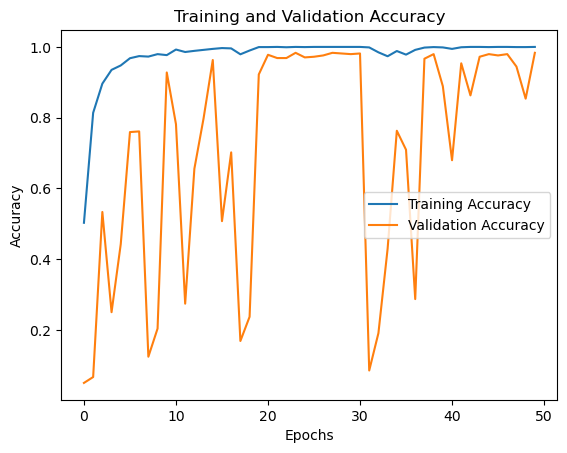

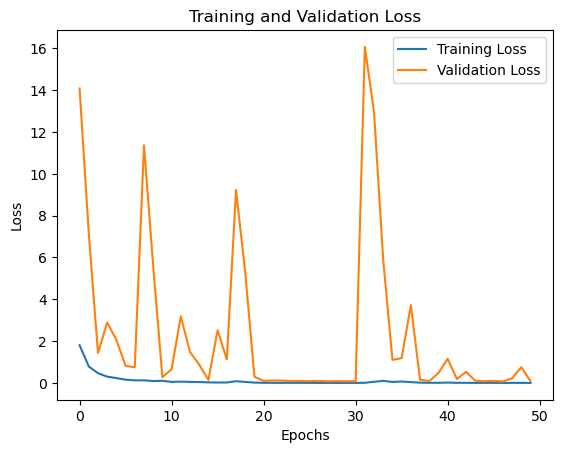

In [22]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()